In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
df.shape

(545, 13)

<Axes: xlabel='price', ylabel='area'>

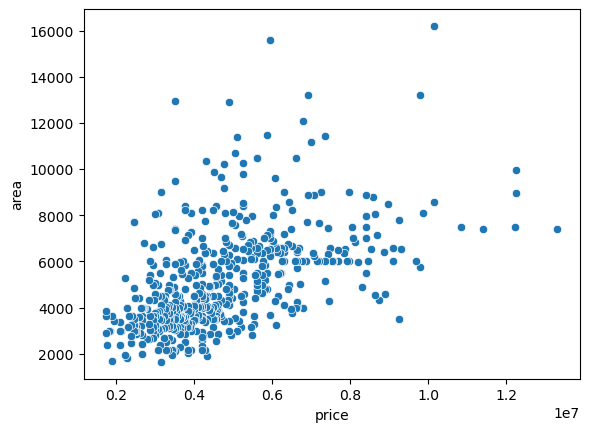

In [6]:
sns.scatterplot(data=df,x='price',y='area')

In [7]:
low_p,high_p=df['price'].quantile([0.05,0.95])
low_a,high_a=df['area'].quantile([0.05,0.95])

In [8]:
data=df[df['price'].between(low_p,high_p)&df['area'].between(low_a,high_a)]

In [9]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
27,8400000,8875,3,1,1,yes,no,no,no,no,1,no,semi-furnished
28,8400000,7950,5,2,2,yes,no,yes,yes,no,2,no,unfurnished
29,8400000,5500,4,2,2,yes,no,yes,no,yes,1,yes,semi-furnished
30,8400000,7475,3,2,4,yes,no,no,no,yes,2,no,unfurnished
31,8400000,7000,3,1,4,yes,no,no,no,yes,2,no,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,2450000,3240,2,1,1,no,yes,no,no,no,1,no,unfurnished
517,2450000,3000,2,1,1,yes,no,no,no,no,1,no,unfurnished
518,2450000,3500,2,1,1,yes,yes,no,no,no,0,no,unfurnished
519,2450000,4840,2,1,2,yes,no,no,no,no,0,no,unfurnished


<Axes: xlabel='price', ylabel='area'>

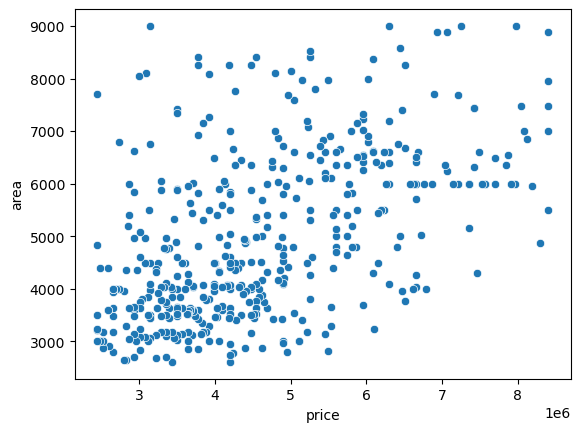

In [10]:
sns.scatterplot(data=data,x='price',y='area')

In [11]:
data.shape

(450, 13)

In [12]:
x=data.drop('price',axis=1)
y=data['price']

In [13]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
27,8875,3,1,1,yes,no,no,no,no,1,no,semi-furnished
28,7950,5,2,2,yes,no,yes,yes,no,2,no,unfurnished
29,5500,4,2,2,yes,no,yes,no,yes,1,yes,semi-furnished
30,7475,3,2,4,yes,no,no,no,yes,2,no,unfurnished
31,7000,3,1,4,yes,no,no,no,yes,2,no,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
516,3240,2,1,1,no,yes,no,no,no,1,no,unfurnished
517,3000,2,1,1,yes,no,no,no,no,1,no,unfurnished
518,3500,2,1,1,yes,yes,no,no,no,0,no,unfurnished
519,4840,2,1,2,yes,no,no,no,no,0,no,unfurnished


In [14]:
y

27     8400000
28     8400000
29     8400000
30     8400000
31     8400000
        ...   
516    2450000
517    2450000
518    2450000
519    2450000
520    2450000
Name: price, Length: 450, dtype: int64

In [15]:
def contain_string(column):
    return any(isinstance(value,str) for value in column)

In [16]:
stringcolumn=[column for column in x.columns if contain_string(x[column])]
string=[]
if contain_string:
    for column in stringcolumn:
        string.append(column)
string

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [17]:
string.remove('furnishingstatus')

In [18]:
string


['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea']

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
for col in string:
    l=LabelEncoder()
    x[col]=l.fit_transform(x[col])

In [21]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
27,8875,3,1,1,1,0,0,0,0,1,0,semi-furnished
28,7950,5,2,2,1,0,1,1,0,2,0,unfurnished
29,5500,4,2,2,1,0,1,0,1,1,1,semi-furnished
30,7475,3,2,4,1,0,0,0,1,2,0,unfurnished
31,7000,3,1,4,1,0,0,0,1,2,0,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
516,3240,2,1,1,0,1,0,0,0,1,0,unfurnished
517,3000,2,1,1,1,0,0,0,0,1,0,unfurnished
518,3500,2,1,1,1,1,0,0,0,0,0,unfurnished
519,4840,2,1,2,1,0,0,0,0,0,0,unfurnished


In [22]:
arr=x['furnishingstatus']
arr

27     semi-furnished
28        unfurnished
29     semi-furnished
30        unfurnished
31     semi-furnished
            ...      
516       unfurnished
517       unfurnished
518       unfurnished
519       unfurnished
520       unfurnished
Name: furnishingstatus, Length: 450, dtype: object

In [23]:
dataset=pd.DataFrame(arr)
dataset

,furnishingstatus
27,semi-furnished
28,unfurnished
29,semi-furnished
30,unfurnished
31,semi-furnished
...,...
516,unfurnished
517,unfurnished
518,unfurnished
519,unfurnished


In [24]:
encoded_data=pd.get_dummies(dataset,columns=['furnishingstatus'],drop_first=True)

In [25]:
encoded_data

,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
27,True,False
28,False,True
29,True,False
30,False,True
31,True,False
...,...,...
516,False,True
517,False,True
518,False,True
519,False,True


In [26]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
27,8875,3,1,1,1,0,0,0,0,1,0,semi-furnished
28,7950,5,2,2,1,0,1,1,0,2,0,unfurnished
29,5500,4,2,2,1,0,1,0,1,1,1,semi-furnished
30,7475,3,2,4,1,0,0,0,1,2,0,unfurnished
31,7000,3,1,4,1,0,0,0,1,2,0,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
516,3240,2,1,1,0,1,0,0,0,1,0,unfurnished
517,3000,2,1,1,1,0,0,0,0,1,0,unfurnished
518,3500,2,1,1,1,1,0,0,0,0,0,unfurnished
519,4840,2,1,2,1,0,0,0,0,0,0,unfurnished


In [27]:
x=x.drop('furnishingstatus',axis=1)

In [28]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
27,8875,3,1,1,1,0,0,0,0,1,0
28,7950,5,2,2,1,0,1,1,0,2,0
29,5500,4,2,2,1,0,1,0,1,1,1
30,7475,3,2,4,1,0,0,0,1,2,0
31,7000,3,1,4,1,0,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
516,3240,2,1,1,0,1,0,0,0,1,0
517,3000,2,1,1,1,0,0,0,0,1,0
518,3500,2,1,1,1,1,0,0,0,0,0
519,4840,2,1,2,1,0,0,0,0,0,0


In [29]:
x=pd.concat([x,encoded_data],axis=1)

In [30]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
27,8875,3,1,1,1,0,0,0,0,1,0,True,False
28,7950,5,2,2,1,0,1,1,0,2,0,False,True
29,5500,4,2,2,1,0,1,0,1,1,1,True,False
30,7475,3,2,4,1,0,0,0,1,2,0,False,True
31,7000,3,1,4,1,0,0,0,1,2,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,3240,2,1,1,0,1,0,0,0,1,0,False,True
517,3000,2,1,1,1,0,0,0,0,1,0,False,True
518,3500,2,1,1,1,1,0,0,0,0,0,False,True
519,4840,2,1,2,1,0,0,0,0,0,0,False,True


In [31]:
y

27     8400000
28     8400000
29     8400000
30     8400000
31     8400000
        ...   
516    2450000
517    2450000
518    2450000
519    2450000
520    2450000
Name: price, Length: 450, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
x_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
80,6000,3,1,2,1,0,0,1,0,1,1,True,False
84,3760,3,1,2,1,0,0,1,0,2,0,True,False
106,5450,4,2,1,1,0,1,0,1,0,1,True,False
53,5150,3,2,4,1,0,0,0,1,2,0,True,False
76,6420,3,2,3,1,0,0,0,1,0,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,4500,2,1,1,1,0,0,0,0,0,0,True,False
237,5010,3,1,2,1,0,1,0,0,0,0,True,False
154,3650,3,2,2,1,0,0,0,0,2,0,True,False
78,5700,3,1,1,1,1,1,0,1,2,1,False,False


In [35]:
x_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
161,6100,3,1,3,1,1,0,0,1,0,1,True,False
86,6670,3,1,3,1,0,1,0,0,0,1,False,True
320,4320,3,1,2,1,0,0,0,0,2,1,False,False
348,3150,2,2,1,0,0,1,0,0,0,0,True,False
279,6360,2,1,1,1,0,0,0,0,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,6862,3,1,2,1,0,0,0,1,2,1,False,False
199,4200,3,1,2,1,0,0,0,0,1,0,False,False
241,3760,3,1,1,1,0,0,0,0,2,0,True,False
291,2953,3,1,2,1,0,1,0,1,0,0,False,True


In [36]:
y_train

80     6629000
84     6510000
106    6160000
53     7350000
76     6650000
        ...   
380    3605000
237    4620000
154    5530000
78     6650000
214    4865000
Name: price, Length: 360, dtype: int64

In [37]:
y_test

161    5460000
86     6510000
320    4060000
348    3815000
279    4270000
        ...   
217    4830000
199    4907000
241    4550000
291    4200000
298    4200000
Name: price, Length: 90, dtype: int64

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lg=LogisticRegression()

In [40]:
lg.fit(x_train,y_train)

C:\Users\bhara\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
y_predict=lg.predict(x_test)

In [49]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [51]:
mean_absolute_error(y_test,y_predict)

894561.1111111111

In [52]:
mean_squared_error(y_test,y_predict)

1876139086111.111

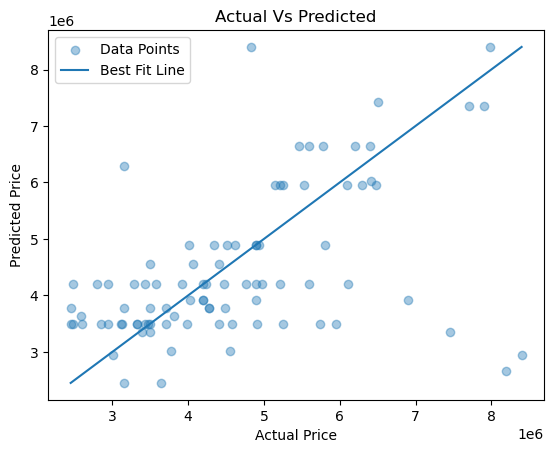

In [58]:
plt.scatter(y_test,y_predict,alpha=0.4)
plt.plot([y.min(),y.max()],[y.min(),y.max()])
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Vs Predicted")
plt.legend(['Data Points', 'Best Fit Line'], loc='upper left')